In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
stock_prices = pd.read_csv(
    '../data/stocks_prices_raw.csv', 
    sep=';',
    index_col=[0]
)

stock_prices.index = pd.to_datetime(stock_prices.index)
stock_prices.index.name = 'time_stamp'
display(stock_prices.shape)

stock_prices = stock_prices[stock_prices.index.dayofweek < 5]

stock_prices = stock_prices.fillna(
    method='ffill',
    limit=5
).fillna(
    method='bfill',
    limit=5
)#.dropna(axis='columns')

#stock_prices = stock_prices.pct_change()
stock_prices = np.log(stock_prices) - np.log(stock_prices.shift(1))

stock_prices = stock_prices.loc[pd.to_datetime('2018-01-01'):pd.to_datetime('2022-09-10'), :]

stock_prices = stock_prices.melt(
    var_name='company',
    value_name='price',
    ignore_index=False
).reset_index().set_index(['company', 'time_stamp'])

display(stock_prices)

stock_prices.to_csv('../data/stocks_prices_prep.csv', sep=';')

(4687, 114)

price
company          time_stamp          
1&1 drillisch ag 2018-01-01  0.000000
                 2018-01-02  0.021255
                 2018-01-03 -0.011519
                 2018-01-04  0.006496
                 2018-01-05  0.005739
...                               ...
zooplus ag       2022-09-05       NaN
                 2022-09-06       NaN
                 2022-09-07       NaN
                 2022-09-08       NaN
                 2022-09-09       NaN

[139650 rows x 1 columns]

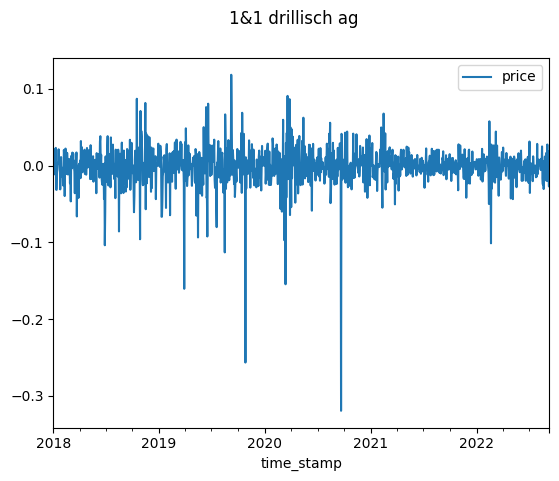

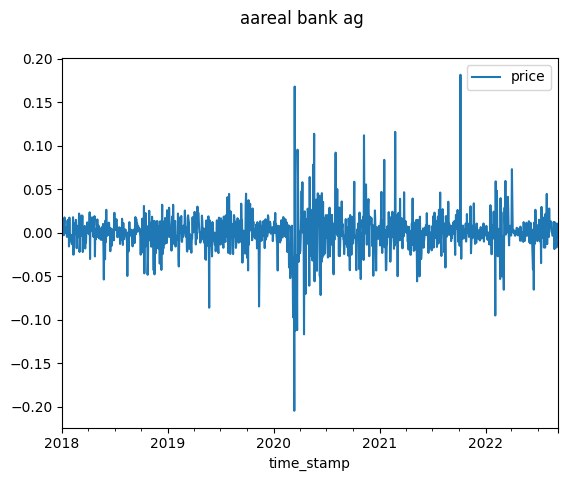

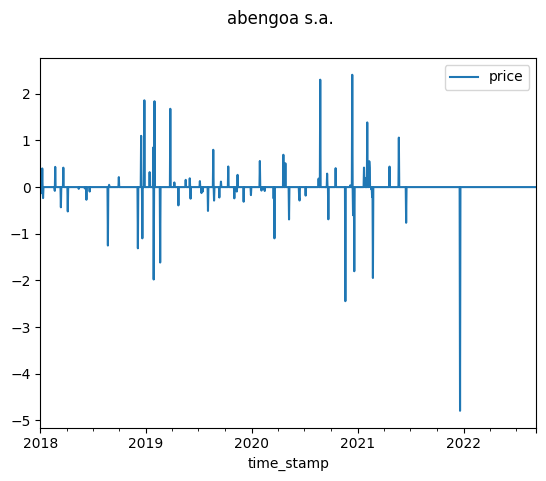

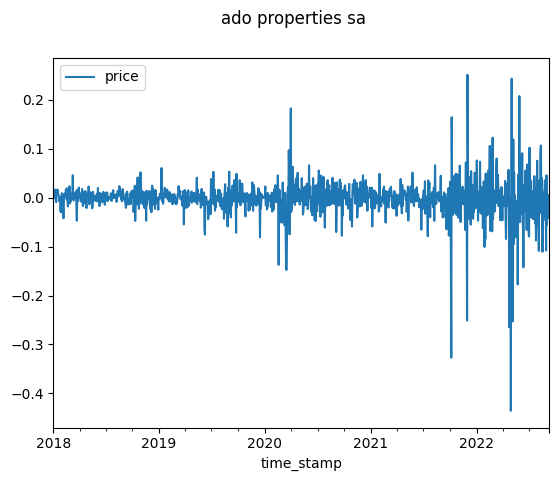

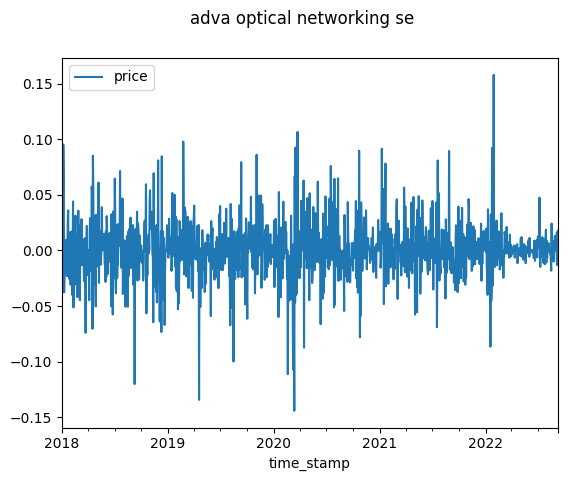

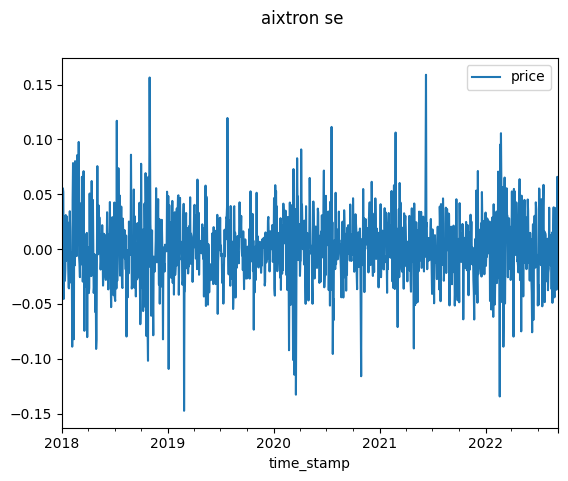

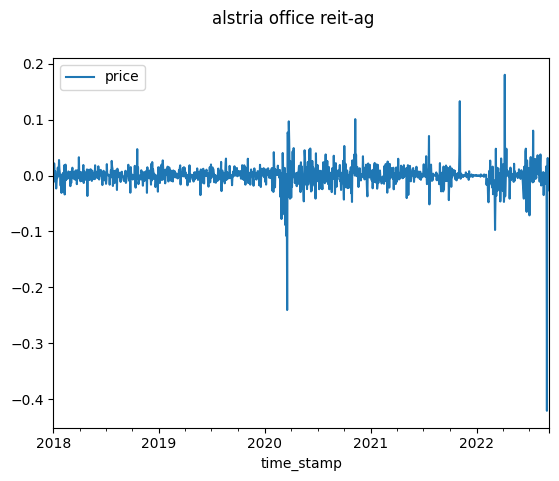

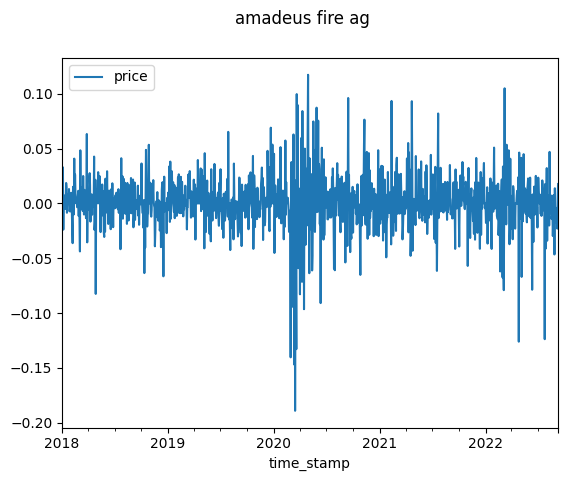

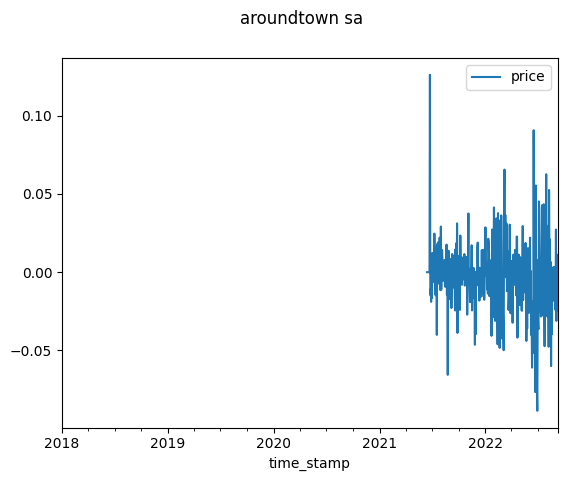

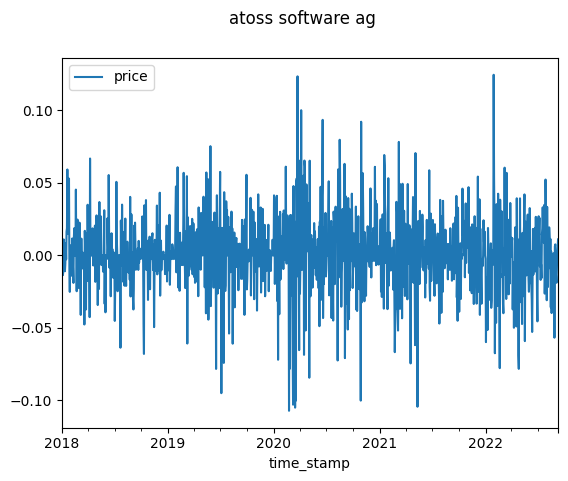

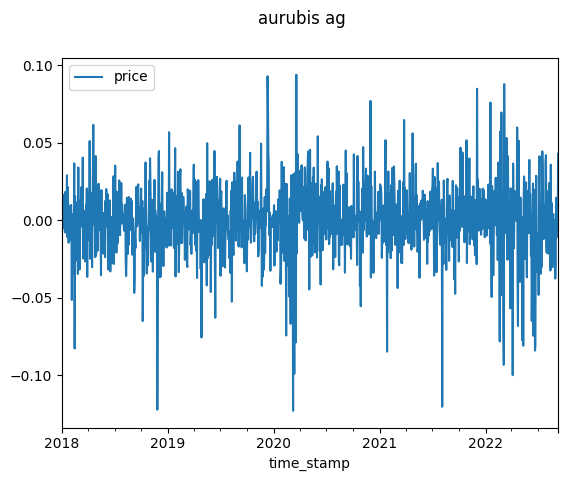

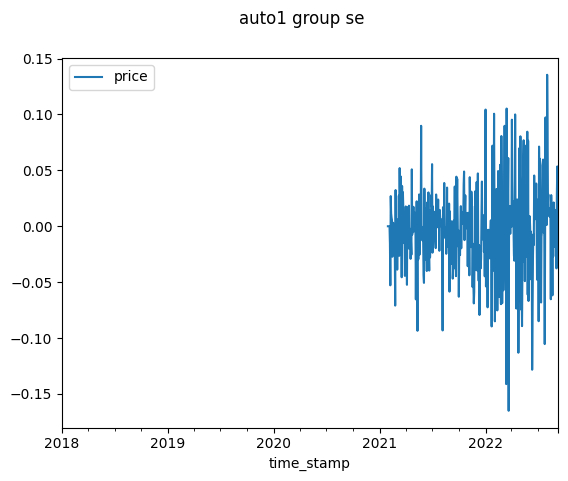

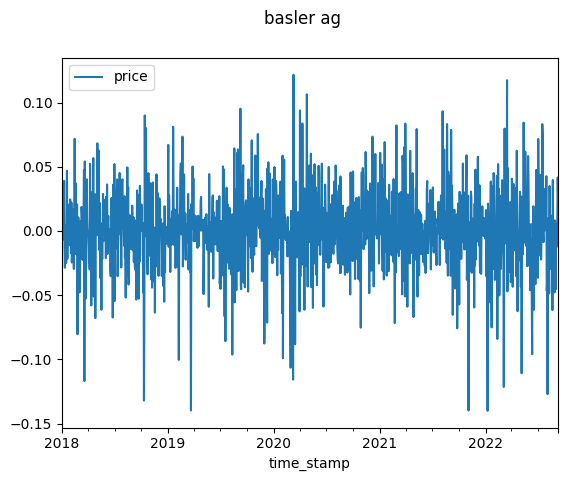

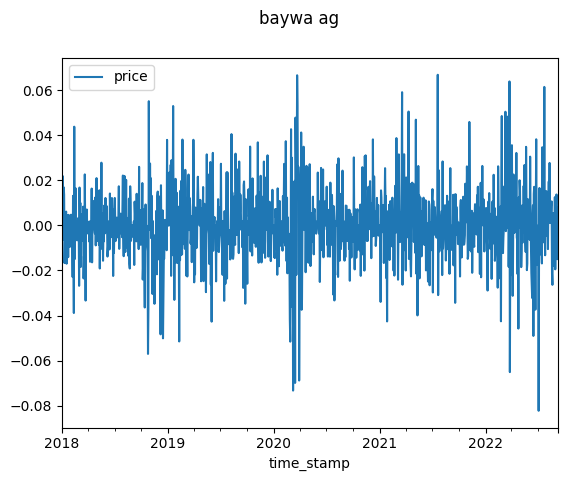

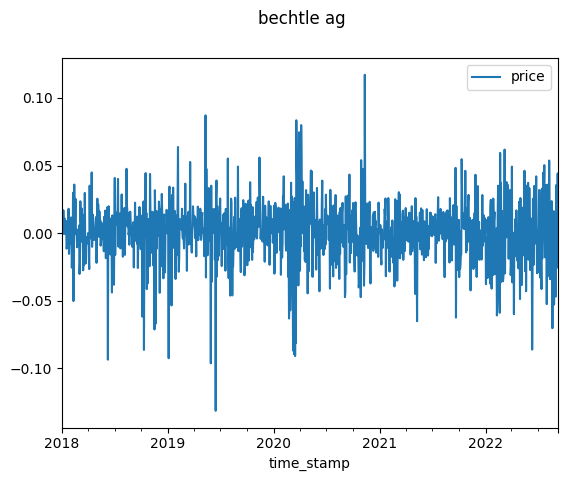

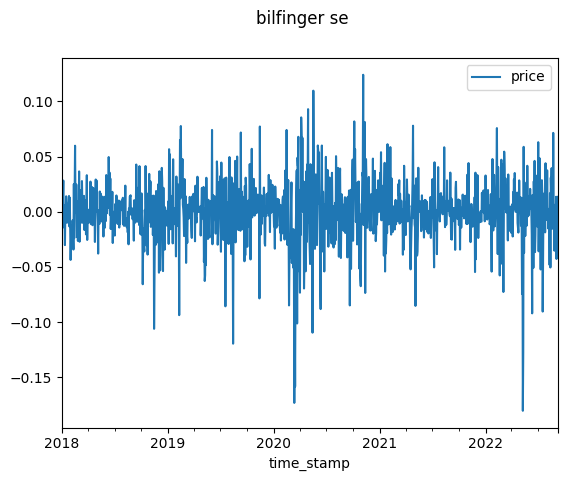

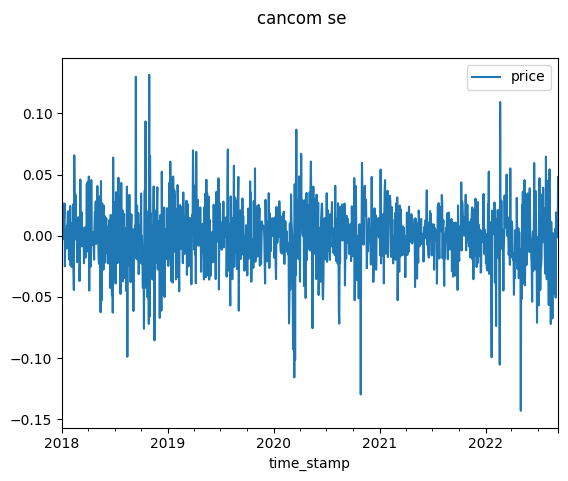

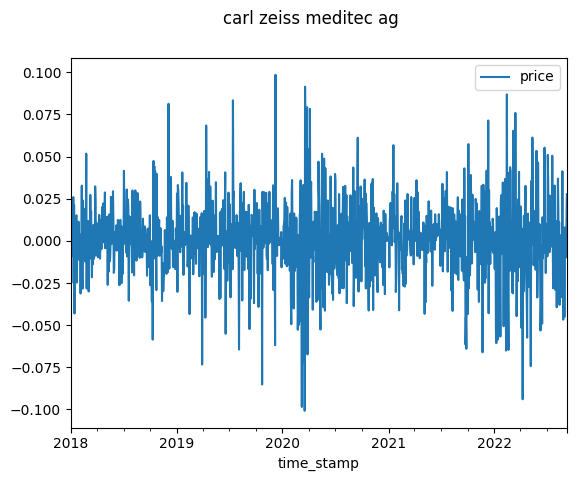

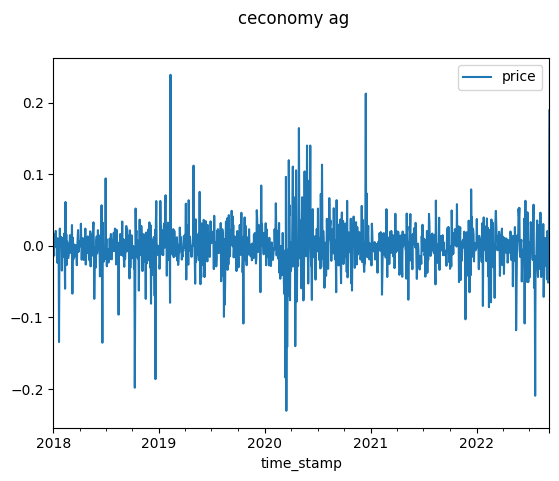

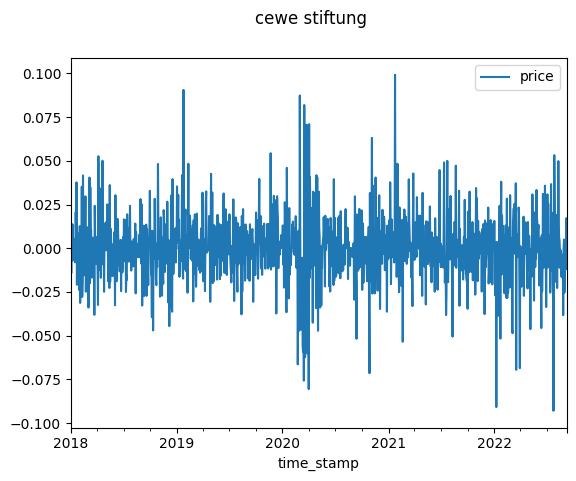

In [26]:
companys = sorted(list(set(stock_prices.index.get_level_values('company'))))

for i in range(20):
    stock_prices.loc[companys[i], :].plot(
        kind='line',
        title=companys[i],
        subplots=True
    )
    plt.show()